In [1]:
import os
import numpy as np
import pandas as pd

module_path = '/Users/morton/PycharmProjects/psifr'
data_file = os.path.join(module_path, 'data', 'cfr_test_data.csv')

In [2]:
df = pd.read_csv(data_file, index_col=['trial_type', 'list', 'item'])
df

position  category
trial_type list item                                     
study      1    SEAN PENN                     1         1
                AUDREY HEPBURN                2         1
                ST PATRICKS CATHEDRAL         3         2
                LES INVALIDES                 4         2
                GREAT ZIMBABWE RUINS          5         2
...                                         ...       ...
recall     30   OAHU BEACH                    7         2
                HOLLYWOOD                     8         2
                WESTMINSTER ABBEY             9         2
                ELIZABETH TAYLOR             10         1
                OLD FAITHFUL                 11         2

[1063 rows x 2 columns]

In [3]:
study = df.loc['study'].copy()
study.loc[:, 'input'] = study['position']
recall = df.loc['recall'].copy()
recall.loc[:, 'output'] = recall['position']

In [4]:
dfm = pd.concat((study['input'], recall['output']), axis=1)

In [5]:
dfm.loc[:, 'recalled'] = dfm['output'].notna().astype('int')
dfm

input  output  recalled
list item                                      
1    ANDRE3000           13.0     NaN         0
     AUDREY HEPBURN       2.0     NaN         0
     BLENDER             21.0     NaN         0
     BRICK               24.0     1.0         1
     BRUSH                8.0     NaN         0
...                       ...     ...       ...
30   WEDDING DRESS       14.0     NaN         0
     WESTMINSTER ABBEY    6.0     9.0         1
     WHISTLE              1.0     NaN         0
     WHITE HOUSE         23.0     2.0         1
     WRIGLEY BUILDING    24.0     1.0         1

[728 rows x 3 columns]

In [6]:
dfm.dropna().loc[1, :].sort_values('output')

,input,output,recalled
item,,,
BRICK,24.0,1.0,1
CHAIR,23.0,2.0,1
JULIA ROBERTS,16.0,3.0,1
JUSTIN TIMBERLAKE,15.0,4.0,1
SEAN PENN,1.0,5.0,1
LEBRON JAMES,17.0,6.0,1
JOHN MCCAIN,18.0,7.0,1
GLASS,19.0,8.0,1
TAHITI,12.0,9.0,1


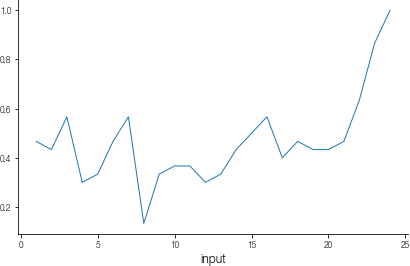

In [7]:
dfm.groupby(['input'])['recalled'].mean().plot();

In [8]:
dfm.groupby('list')['output'].count()

list
1     14
2     18
3      9
4     13
5     11
6     11
7      6
8      7
9      9
10     5
11    12
12    15
13    13
14    11
15     9
16    12
17    12
18    10
19     7
20     7
21    17
22    17
23    16
24    14
25    16
26    12
27     9
28    13
29     7
30    11
Name: output, dtype: int64